In [25]:
import numpy as np 
import pandas as pd
import os

# Modify the path to point to your dataset
path_to_dataset = 'C:\\Users\saini\\OneDrive\\Downloads\\labeled_data.csv.zip'

# Use the path
for dirname, _, filenames in os.walk(path_to_dataset):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [27]:
import nltk
import re
from nltk.corpus import stopwords

stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

In [28]:
data = pd.read_csv("C:\\Users\saini\\OneDrive\\Downloads\\labeled_data.csv.zip")
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [29]:
data["labels"] = data["class"].map({0:"Hate Speech", 1:"Offensive Speech", 2:"No Hate and Offensive Speech"})

In [30]:
import re

In [31]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[,?]', '', text)
    text = re.sub('https?://\S+|www.\S+', '', text)
    text = re.sub('<,?>+', '',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('\n','',text)
    text = re.sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

In [32]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [33]:
cv = CountVectorizer()

In [34]:
x = cv.fit_transform(x)

In [35]:
X_train, X_text, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [36]:
model = DecisionTreeClassifier()

In [37]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = model.predict(X_text)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8784692505196234


In [40]:
i = "I Hate You"
i = cv.transform([i]).toarray()
print(model.predict((i)))

['No Hate and Offensive Speech']


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                              precision    recall  f1-score   support

                 Hate Speech       0.36      0.34      0.35       465
No Hate and Offensive Speech       0.80      0.86      0.83      1379
            Offensive Speech       0.93      0.92      0.93      6335

                    accuracy                           0.88      8179
                   macro avg       0.70      0.71      0.70      8179
                weighted avg       0.88      0.88      0.88      8179



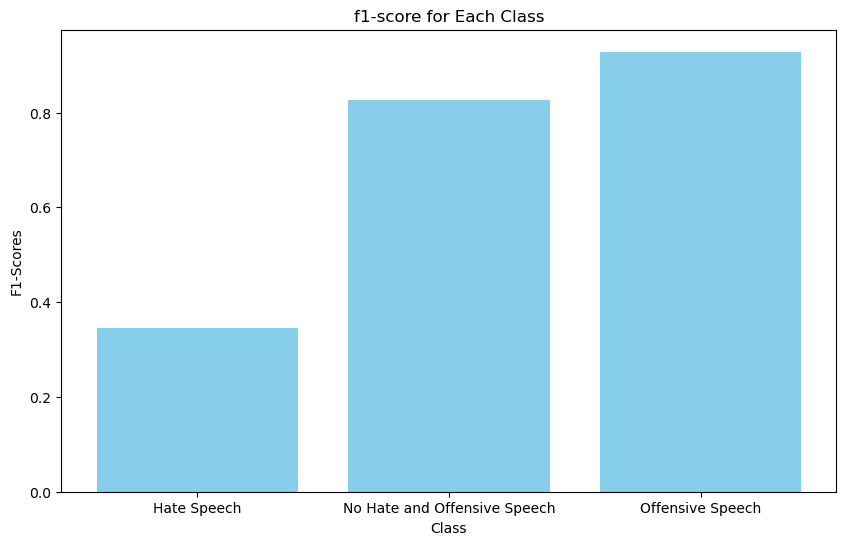

In [42]:
import matplotlib.pyplot as plt

report = classification_report(y_test, y_pred, output_dict=True)

classes = list(report.keys())[:-3]  
f1_scores = [report[cls]['f1-score'] for cls in classes]

plt.figure(figsize=(10, 6))
plt.bar(classes, f1_scores, color='skyblue')
plt.title('f1-score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1-Scores')
plt.show()

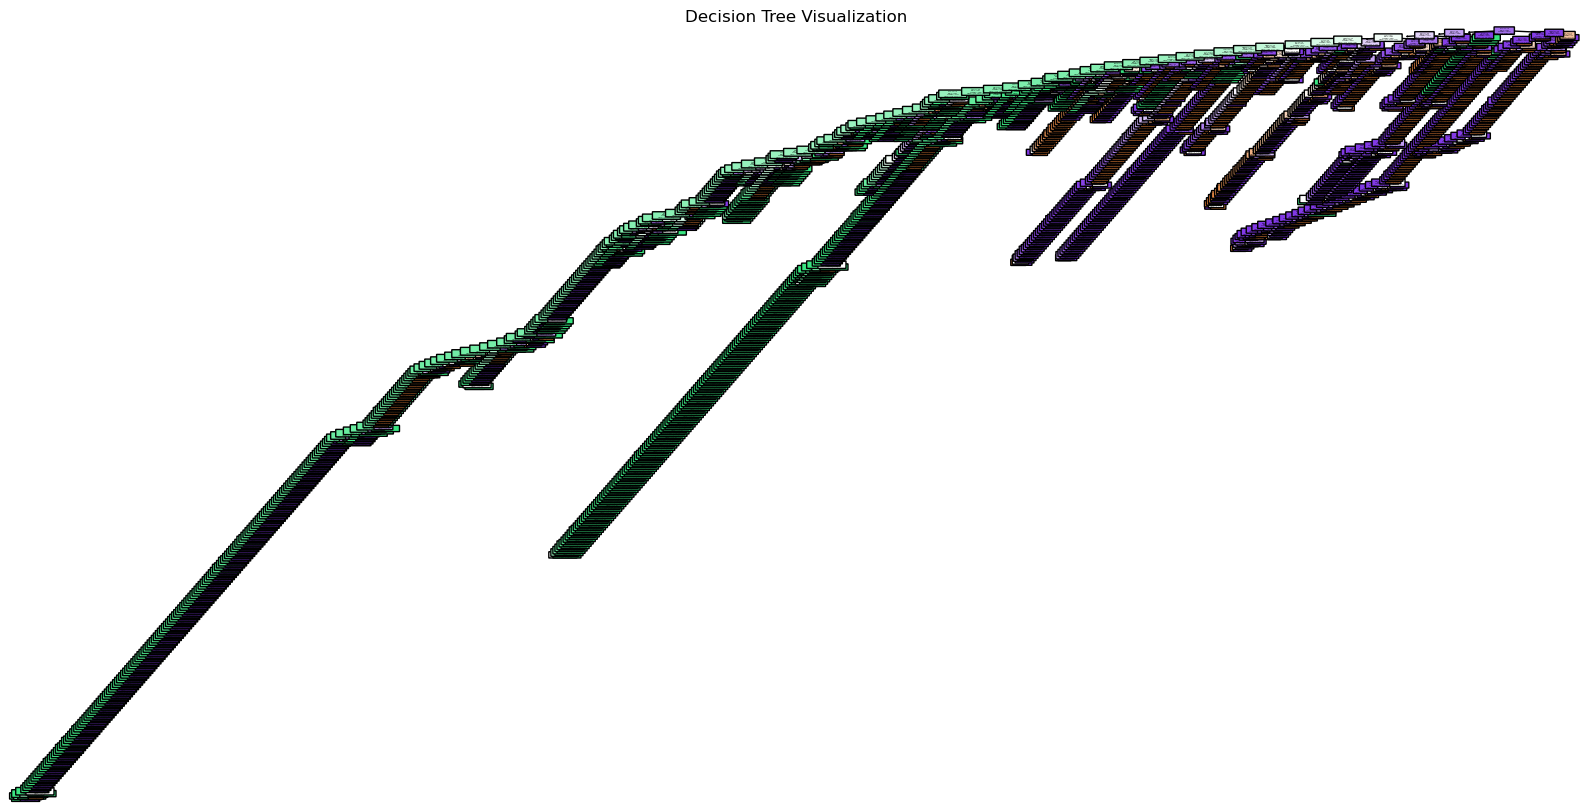

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=list(cv.get_feature_names_out()), class_names=list(map(str, model.classes_)), rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
